In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 94.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastbook import *

In [ ]:
from fastai.vision import *
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import os
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tfms = aug_transforms(do_flip=False)
path = '/content/drive/My Drive/fastai'
data = ImageDataLoaders.from_folder(path, train = 'train', valid = 'test',
                                    item_tfms = Resize(224), seed = 42,
                                    num_workers = 3, bs = 64, valid_pct=0.2)

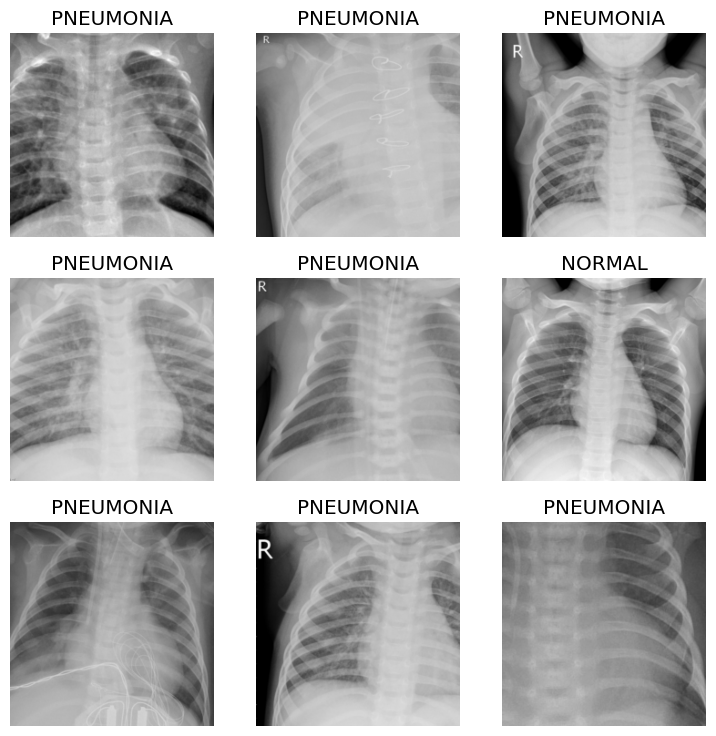

In [ ]:
data.show_batch()

In [ ]:
my_trained_mod = cnn_learner(data, models.resnet34, metrics=error_rate)
my_trained_mod.fit_one_cycle(5)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,error_rate,time
0,0.573617,0.197564,0.064212,13:18
1,0.287433,0.140223,0.049658,02:18
2,0.202452,0.111115,0.035103,02:20
3,0.148094,0.101010,0.033390,02:18
4,0.110408,0.092604,0.031678,02:21


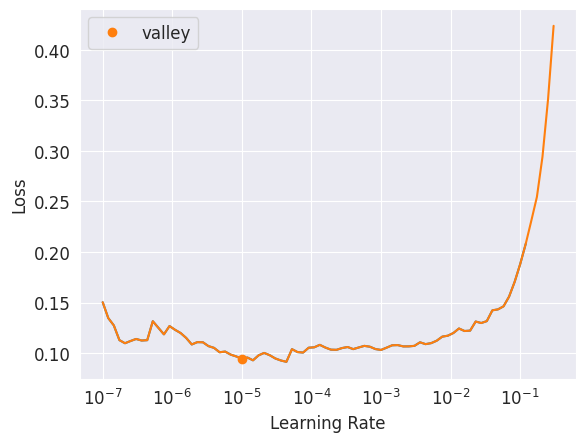

In [ ]:
# Check the learning rate
my_trained_mod.lr_find()
plt.plot(my_trained_mod.recorder.lrs, my_trained_mod.recorder.losses)

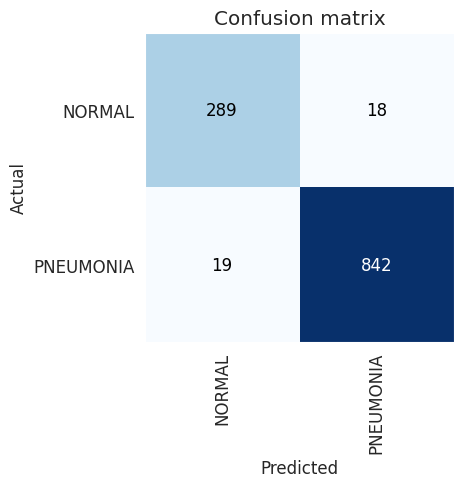

In [ ]:
interp = ClassificationInterpretation.from_learner(my_trained_mod)
interp.plot_confusion_matrix()

In [ ]:
interp = ClassificationInterpretation.from_learner(my_trained_mod)
upp, low = interp.confusion_matrix()
tn, fp = upp[0], upp[1]
fn, tp = low[0], low[1]
specificity = tn/(fp + tn)

In [ ]:
specificity

0.9413680781758957

In [ ]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print(recall)
print(precision)

0.9779326364692218
0.9790697674418605


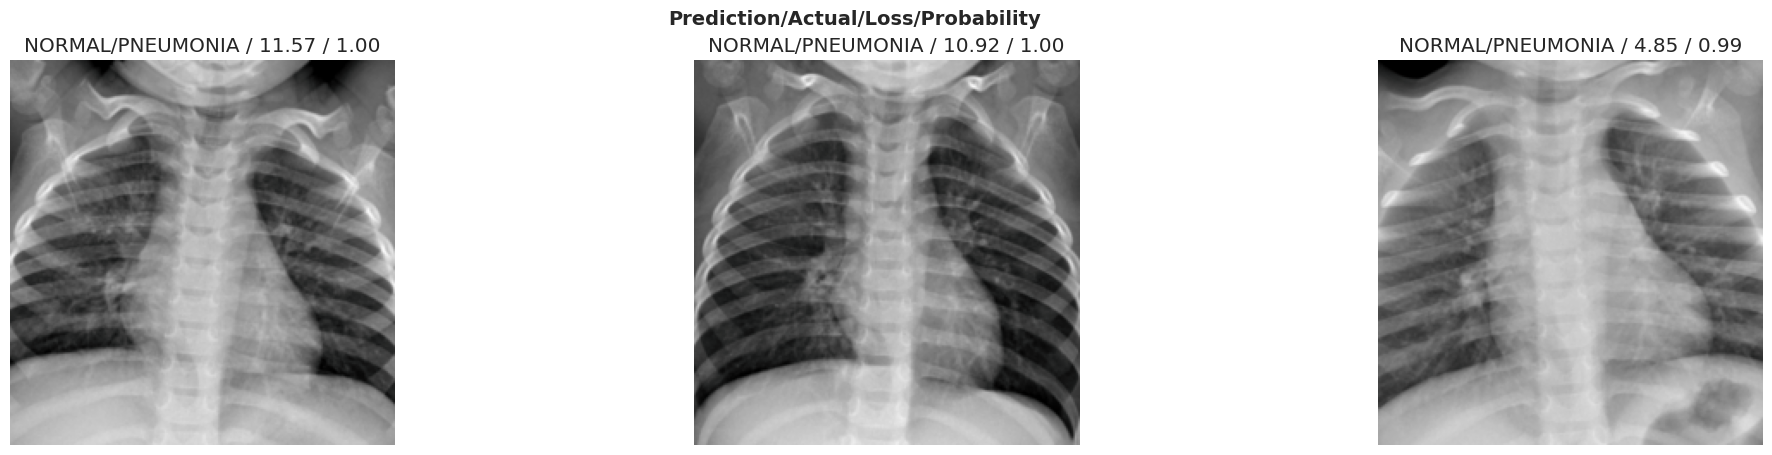

In [ ]:
interp.plot_top_losses(3, nrows=1, figsize = (25,5))

In [ ]:
my_trained_mod.fit_one_cycle(3, lr_max=slice(1e-6,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,1.010693,0.896638,0.061644,02:17
1,0.652298,0.305122,0.042808,02:20
2,0.273906,0.110784,0.030822,02:17


In [ ]:
my_trained_mod.export()

In [ ]:
path = Path ('/content/drive/My Drive/fastai')
path.ls(file_exts= '.pkl')

(#1) [Path('/content/drive/My Drive/fastai/export.pkl')]

In [ ]:
learn_inf = load_learner('/content/drive/My Drive/fastai/export.pkl')

In [ ]:
# normal X-ray
learn_inf.predict('/content/drive/MyDrive/fastai/test/NORMAL/IM-0005-0001.jpeg')

('NORMAL', tensor(0), tensor([9.9995e-01, 5.2983e-05]))

In [ ]:
learn_inf.predict('/content/drive/MyDrive/fastai/test/PNEUMONIA/person44_virus_94.jpeg')

('PNEUMONIA', tensor(1), tensor([0.2240, 0.7760]))

In [ ]:
learn_inf.predict('/content/drive/MyDrive/fastai/test/NORMAL/IM-0109-0001.jpeg')

('NORMAL', tensor(0), tensor([1.0000e+00, 6.9105e-09]))

In [ ]:
learn_inf.predict('/content/drive/MyDrive/fastai/test/PNEUMONIA/person101_bacteria_484.jpeg')

('PNEUMONIA', tensor(1), tensor([1.5851e-05, 9.9998e-01]))

In [ ]:
import os
!pip install -q streamlit

import streamlit as st


def file_selector(folder_path='.'):
    filenames = os.listdir(folder_path)
    selected_filename = st.selectbox('Select a file', filenames)
    return os.path.join(folder_path, selected_filename)


if __name__ == '__main__':
    # Select a file
    if st.checkbox('Select a file in current directory'):
        folder_path = '.'
        if st.checkbox('Change directory'):
            folder_path = st.text_input('Enter folder path', '.')
        filename = file_selector(folder_path=folder_path)
        st.write('You selected `%s`' % filename)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00


2023-05-06 00:12:02.477 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]
